In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train_Data.csv")

In [3]:
df.shape

(22584, 19)

In [4]:
df.head()

,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma,pred
0,y,83.71,63.0,7.2,52.5,14.0232,130.8300,12.4280,188.8425,8.9520,201.1905,9.2896,141.9075,16.0968,150.3390,12.4880,173.1240,m78,0
1,y,108.94,31.5,12.8,84.0,13.2840,128.8350,13.5256,183.0990,8.8520,207.2385,8.4704,154.7805,13.3304,101.0205,12.5096,131.4075,m78,0
2,E,169.65,0.0,5.6,73.5,14.5472,128.9295,13.6424,174.4680,8.9800,190.3125,11.3056,156.7650,NaN,122.5350,11.7136,176.8200,m76,1
3,x,122.42,31.5,7.2,63.0,15.0152,119.8575,12.3344,186.8580,10.7208,193.8195,10.6096,175.7490,NaN,124.8030,13.8424,168.2625,m55,0
4,E,125.43,94.5,7.2,42.0,14.4176,135.4290,14.5824,187.8135,9.3088,203.1540,9.8280,172.7040,14.4720,120.2145,NaN,150.1185,m76,0


In [5]:
df.isnull().sum()

pc         0
ld       222
m0         0
m1         0
m2         0
m3       314
m4       467
m5       576
m6       675
m7       788
m8       900
m9      1047
m10     1100
m11     1227
m12     1381
m13     1499
m14     1589
ma         0
pred       0
dtype: int64

In [6]:
#mean = df.ld.mean()
#df.ld.fillna(mean,inplace= True)
#df.ld.isnull().sum()

#think later 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('ma'):
        m = np.mean(subdf.ld)
        st= np.std(subdf.ld)
        reduced_df = subdf[(subdf.ld > (m-st)) & (subdf.ld <= (m+st))]
        df_out = pd.concat([df_out , reduced_df],ignore_index = True)
    return df_out
df7=remove_pps_outliers(df)
df7.shape

In [7]:
df.skew(axis = 0)

C:\Users\harsh\AppData\Local\Temp\ipykernel_17060\3517674506.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis = 0)


ld      0.947883
m0      0.694593
m1      0.476701
m2      0.587808
m3     -0.012681
m4      0.014183
m5      0.010545
m6     -0.009473
m7     -0.018630
m8      0.016980
m9     -0.009953
m10    -0.035048
m11    -0.094557
m12    -0.056440
m13     0.240490
m14    -0.051753
pred    1.381995
dtype: float64

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ld'>

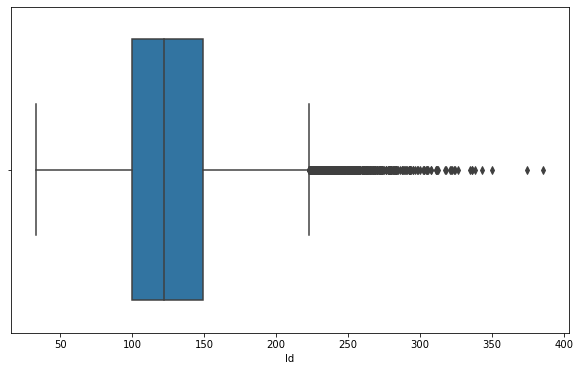

In [8]:
fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.ld)

Clearly , we can not use mean imputation as there are large number of outliers

In [9]:
#ld column is heavily skewed as 0.95 > 0.5 so median imputation is preferred

In [10]:
med = df.ld.median()
df.ld.fillna(med,inplace = True)
df.ld.isnull().sum()

0

-0.012680622070856908

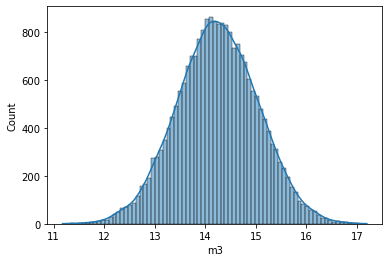

In [11]:
sns.histplot(df['m3'],kde=True)
df.m3.skew()

In [12]:
m3_mean = df.m3.mean()
df.m3.fillna(m3_mean,inplace = True)
df.m3.isnull().sum()

0

0.01418258877144925

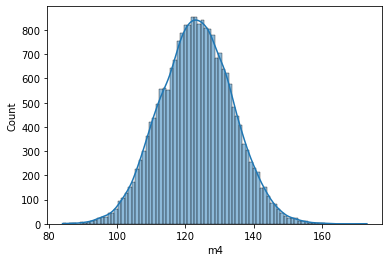

In [13]:
sns.histplot(df.m4,kde = True)
df.m4.skew(axis =0)

In [14]:
m4_mean = df.m4.mean()
df.m4.fillna(m4_mean,inplace = True)
df.m4.isnull().sum()

0

0.010545484107691416

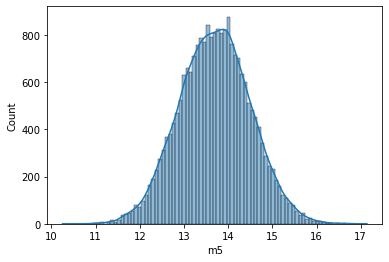

In [15]:
sns.histplot(df.m5,kde = True)
df.m5.skew()

In [16]:
m5_mean = df.m5.mean()
df.m5.fillna(m5_mean,inplace = True)
df.m5.isnull().sum()

0

-0.009472592551641904

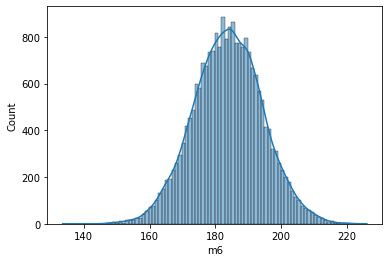

In [17]:
sns.histplot(df.m6,kde = True)
df.m6.skew()

In [18]:
m6_mean = df.m6.mean()
df.m6.fillna(m6_mean,inplace = True)
df.m6.isnull().sum()

0

-0.01863029231475716

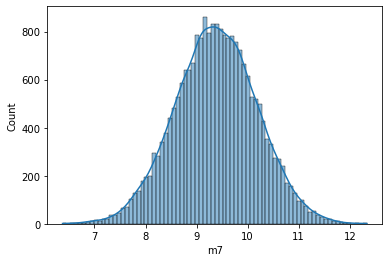

In [19]:
sns.histplot(df.m7,kde = True)
df.m7.skew()

In [20]:
m7_mean = df.m7.mean()
df.m7.fillna(m7_mean,inplace = True)
df.m7.isnull().sum()

0

0.0169801188637358

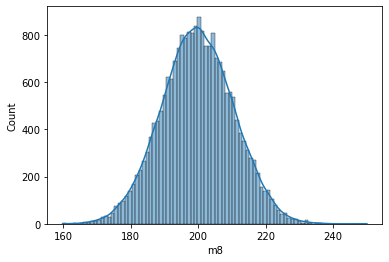

In [21]:
sns.histplot(df.m8,kde = True)
df.m8.skew()

In [22]:
m8_mean = df.m8.mean()
df.m8.fillna(m8_mean,inplace = True)
df.m8.isnull().sum()

0

-0.009953065457062007

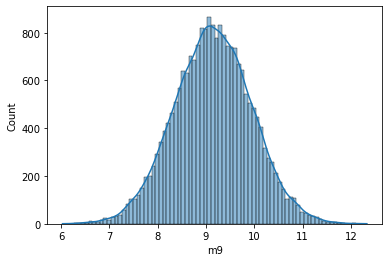

In [23]:
sns.histplot(df.m9,kde = True)
df.m9.skew()

In [24]:
m9_mean = df.m9.mean()
df.m9.fillna(m9_mean,inplace = True)
df.m9.isnull().sum()

0

-0.03504759475643185

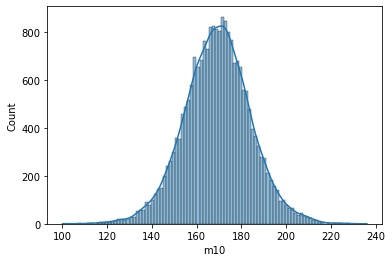

In [25]:
sns.histplot(df.m10,kde = True)
df.m10.skew()

In [26]:
m10_mean = df.m10.mean()
df.m10.fillna(m10_mean,inplace = True)
df.m10.isnull().sum()

0

-0.09455721245488337

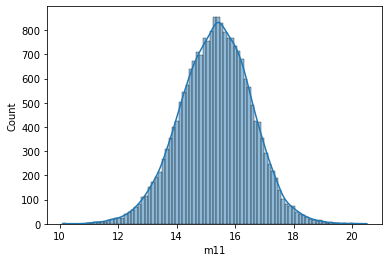

In [27]:
sns.histplot(df.m11,kde = True)
df.m11.skew()

In [28]:
m11_mean = df.m11.mean()
df.m11.fillna(m11_mean,inplace = True)
df.m11.isnull().sum()

0

-0.056440145223438404

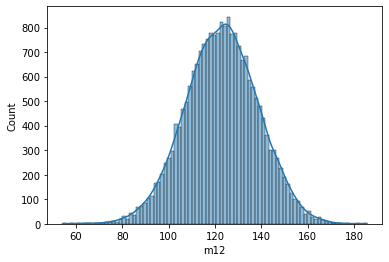

In [29]:
sns.histplot(df.m12,kde = True)
df.m12.skew()

In [30]:
m12_mean = df.m12.mean()
df.m12.fillna(m12_mean,inplace = True)
df.m12.isnull().sum()

0

0.24049046608004093

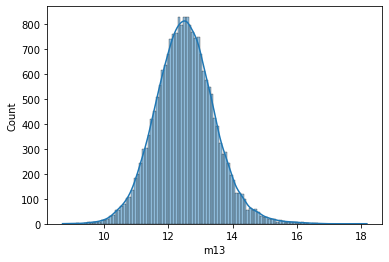

In [31]:
sns.histplot(df.m13,kde = True)
df.m13.skew()

In [32]:
m13_mean = df.m13.mean()
df.m13.fillna(m13_mean,inplace = True)
df.m13.isnull().sum()

0

-0.05175255087599011

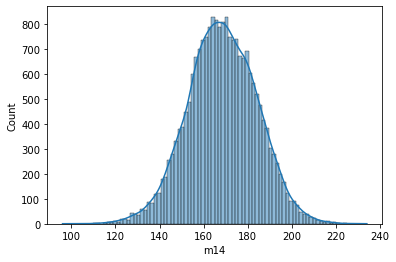

In [33]:
sns.histplot(df.m14,kde = True)
df.m14.skew()

In [34]:
m14_mean = df.m14.mean()
df.m14.fillna(m14_mean,inplace = True)
df.m14.isnull().sum()

0

In [35]:
df.isnull().sum()

pc      0
ld      0
m0      0
m1      0
m2      0
m3      0
m4      0
m5      0
m6      0
m7      0
m8      0
m9      0
m10     0
m11     0
m12     0
m13     0
m14     0
ma      0
pred    0
dtype: int64

In [36]:
df3 = pd.get_dummies(df,columns = ['pc','ma'],prefix = ['pc_code','ma_code'])

In [37]:
df3.shape

(22584, 26)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df3.drop('pred',axis = 1)
y = df3.pred

In [40]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [41]:
from sklearn.linear_model import LogisticRegression 
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7972105379676777

In [42]:
new_data = pd.read_csv("Test_Data.csv")

In [43]:
new_data.head()

,index,pc,ld,m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,ma
0,0,E,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,187.6560,8.3472,178.5945,14.3192,138.0435,12.7008,166.1100,m76
1,1,y,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,202.5870,8.5416,166.9815,15.5944,142.5690,11.6832,177.7230,m78
2,2,w,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,214.2735,11.3392,155.1795,16.0256,132.1005,13.0104,185.6085,m78
3,3,z,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,213.4650,9.9224,191.1000,14.8256,128.0475,12.1984,180.2745,m75
4,4,x,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,191.2050,9.9400,185.0310,13.8664,124.7610,NaN,157.6470,m55


In [44]:
new_data.skew(axis = 0)

C:\Users\harsh\AppData\Local\Temp\ipykernel_17060\1401083288.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_data.skew(axis = 0)


index    0.000000
ld       1.008613
m0       0.770973
m1       0.474708
m2       0.617869
m3       0.060764
m4      -0.036484
m5       0.028876
m6      -0.012267
m7      -0.018647
m8       0.006886
m9       0.035564
m10     -0.007866
m11     -0.169240
m12     -0.034884
m13      0.218457
m14     -0.089538
dtype: float64

In [45]:
# Assuming your DataFrame is called 'df4'
columns_to_fill = ['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14']

# Fill NaN values with column means
new_data[columns_to_fill] = new_data[columns_to_fill].fillna(new_data[columns_to_fill].mean())
new_data.isnull().sum()

index     0
pc        0
ld       28
m0        0
m1        0
m2        0
m3        0
m4        0
m5        0
m6        0
m7        0
m8        0
m9        0
m10       0
m11       0
m12       0
m13       0
m14       0
ma        0
dtype: int64

In [46]:
df4 = pd.get_dummies(new_data,columns = ['pc','ma'],prefix = ['pc_code','ma_code'])
df4.head()

,index,ld,m0,m1,m2,m3,m4,m5,m6,m7,...,m14,pc_code_E,pc_code_w,pc_code_x,pc_code_y,pc_code_z,ma_code_m55,ma_code_m75,ma_code_m76,ma_code_m78
0,0,156.46,73.5,8.8,105.0,13.2768,113.5365,13.9552,168.5460,8.5896,...,166.1100,1,0,0,0,0,0,0,1,0
1,1,58.87,84.0,12.8,42.0,14.4440,126.6930,13.6688,190.6275,10.1712,...,177.7230,0,0,0,1,0,0,0,0,1
2,2,139.68,126.0,3.2,73.5,14.2432,107.4885,13.8544,168.3255,10.2504,...,185.6085,0,1,0,0,0,0,0,0,1
3,3,194.06,52.5,6.4,105.0,14.5480,138.6105,13.5080,196.6545,10.6304,...,180.2745,0,0,0,0,1,0,1,0,0
4,4,173.14,42.0,8.0,136.5,14.9496,103.8765,13.8936,168.3570,9.6184,...,157.6470,0,0,1,0,0,1,0,0,0


In [47]:
med_n = df4.ld.median()
df4.ld.fillna(med,inplace = True)
df4.ld.isnull().sum()


0

In [48]:
df4.columns

Index(['index', 'ld', 'm0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8',
       'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'pc_code_E', 'pc_code_w',
       'pc_code_x', 'pc_code_y', 'pc_code_z', 'ma_code_m55', 'ma_code_m75',
       'ma_code_m76', 'ma_code_m78'],
      dtype='object')

In [59]:
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'lightgbm'

In [51]:
cat_clf = CatBoostClassifier()

In [53]:
cat_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_clf.predict(X_test)

from sklearn.metrics import accuracy_score
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7956608368386097


In [55]:
pred_df = pd.DataFrame({'pred': y_pred})

# Save predictions to a CSV file
pred_df.to_csv('predictions_ada.csv', index=False)